In [64]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [65]:
# Loading the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
# Select relevant features
X = data[["GrLivArea", "BedroomAbvGr", "FullBath"]]
y = data["SalePrice"]

In [67]:
X.head()

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2


In [68]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [69]:
# Splitting the dataset into training and testing set
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Prediction on test data
y_predict = model.predict(X_test)
x_predict = model.predict(X_train)

In [72]:
# Model evaluation
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse:.2f}")
rmse = mean_squared_error(y_test, y_predict,squared = False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 2806426667.25
Root Mean Squared Error: 52975.72


In [73]:
#prediction for a new house 1
new_house = pd.DataFrame([[20000, 5, 3]], columns=["GrLivArea", "BedroomAbvGr", "FullBath"])
predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")

Predicted price for the new house: $2,089,555.03


In [74]:
#prediction for a new house 2
new_house = pd.DataFrame([[5000, 6, 3]], columns=["GrLivArea", "BedroomAbvGr", "FullBath"])
predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")

Predicted price for the new house: $502,505.26


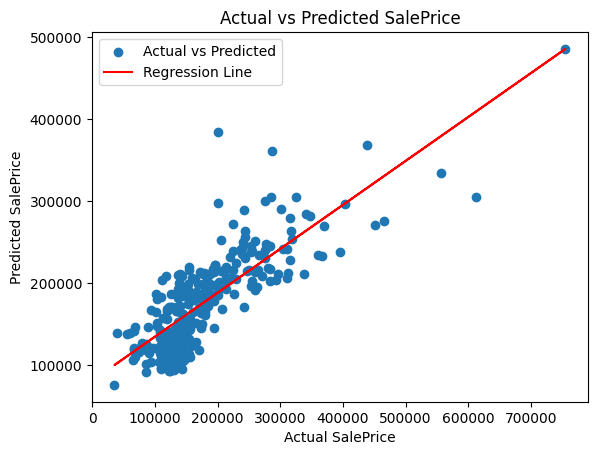

In [63]:
# Assuming y_test and y_predict are your actual and predicted values
# If not already in numpy arrays, converting them into numpy array
y_test = np.array(y_test)
y_predict = np.array(y_predict)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_predict, label='Actual vs Predicted')

# Plot the regression line
# Calculate the coefficients
m, b = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Regression Line')

# Add labels and title
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.legend()

# Show the plot
plt.show()
